## Project: Drawing insights from Stack Overflow Annual Developer Survey

### Introduction: 
I will be using Stack Overflow's Annual Developer Survey data to draw business insights and train a predictive model to assist stakeholder's data driven decision making. 

Data is downloaded from: https://survey.stackoverflow.co/

#### Dataset Description:
There are seven sections in this survey. The 2nd, 3rd, 4th, and 5th sections will
appear in a random order.
1. Basic Information
2. Education, Work, and Career
3. Technology and Tech Culture
4. Stack Overflow Usage + Community
5. Artificial Intelligence
6. Professional Developer Series (Optional)
7. Final Questions
Most questions in this survey are optional. Required questions are marked with *.
This anonymous survey will take about 15 minutes to complete. We encourage you
to complete it in one sitting.

**I am only interested in section 1 and 2 so I will be creating a subset later on**

### Business Understanding: 

> What size organizations do most developers work at who completed the survey.

> How does Organization Size Affect Income?

> Create a machine learning model to predict income based on 'Age', 'EdLevel', 'OrgSize', and 'CompTotal in the US.

### Data Understanding: 

> Explore data sources and data quality.

> Conduct initial exploratory data analysis (EDA) using visualization and statistics.

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('survey_results_public2024.csv')
pd.set_option('display.max_columns', None)
df.head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [3]:
#Let's create a subset of the features we are interested in 
df_sub = df[['Age', 'EdLevel', 'OrgSize', 'Country', 'CompTotal']]

### Data Preparation

> Merge, clean, and transform data.

> Address issues like outliers and missing values.

In [4]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        65437 non-null  object 
 1   EdLevel    60784 non-null  object 
 2   OrgSize    47480 non-null  object 
 3   Country    58930 non-null  object 
 4   CompTotal  33740 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


In [5]:
# Let's drop all null values so that we can work with a clean precise dataframe
df_sub = df_sub.dropna()

In [6]:
# Confirming we dropped all the null values
df_sub.isna().sum()

Age          0
EdLevel      0
OrgSize      0
Country      0
CompTotal    0
dtype: int64

In [8]:
df_sub['CompTotal'].describe()

count     3.370500e+04
mean     2.966919e+145
std      5.446943e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64

<Axes: xlabel='CompTotal'>

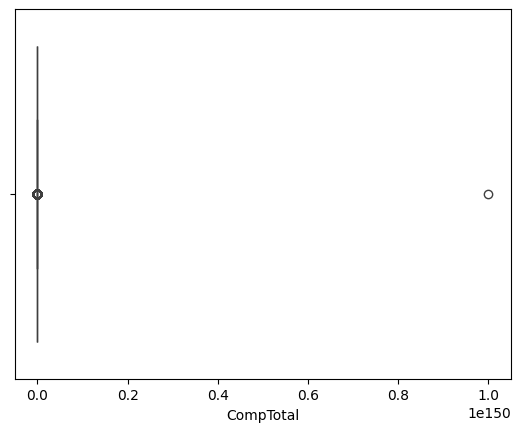

In [9]:
sns.boxplot(data=df_sub, x='CompTotal')

There are clearly some outliers in our dataframe. Let's start cleaning/filtering the data so we can furthur explore our dataframe. 

In [10]:
# Let's filter out all countries except for the United States so that CompTotal can be consistent 
# since currency scaling is different in different countries.

df_sub = df_sub[df_sub['Country'].str.contains('United States')]
df_sub.head()

,Age,EdLevel,OrgSize,Country,CompTotal
389,25-34 years old,Some college/university study without earning ...,10 to 19 employees,United States of America,110000.0
398,45-54 years old,Some college/university study without earning ...,"1,000 to 4,999 employees",United States of America,195000.0
428,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",100 to 499 employees,United States of America,230000.0
431,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20 to 99 employees,United States of America,85000.0
432,35-44 years old,"Secondary school (e.g. American high school, G...",10 to 19 employees,United States of America,160000.0


In [11]:
df_sub['CompTotal'].describe()

count    7.034000e+03
mean     1.590692e+11
std      1.324849e+13
min      0.000000e+00
25%      1.040000e+05
50%      1.470000e+05
75%      2.000000e+05
max      1.111111e+15
Name: CompTotal, dtype: float64

In [12]:
# Seems like theres still outliers, let's figure what it is and remove it.
# Let's remove anyone who makes more than $500,000 annually
df_sub[df_sub['CompTotal'] > 500000]

,Age,EdLevel,OrgSize,Country,CompTotal
529,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","10,000 or more employees",United States of America,650000.0
828,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","10,000 or more employees",United States of America,1000000.0
1488,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","10,000 or more employees",United States of America,600000.0
1932,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","1,000 to 4,999 employees",United States of America,945000.0
2171,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",100 to 499 employees,United States of America,750000.0
...,...,...,...,...,...
61590,45-54 years old,Some college/university study without earning ...,"1,000 to 4,999 employees",United States of America,750000.0
61736,35-44 years old,"Secondary school (e.g. American high school, G...",2 to 9 employees,United States of America,780000.0
62894,35-44 years old,Some college/university study without earning ...,20 to 99 employees,United States of America,600000.0
62906,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","10,000 or more employees",United States of America,550000.0


In [40]:
# Filtering the dataframe of people who make more than $500k annually
df_cleaned = df_sub[df_sub['CompTotal'] < 500000]

In [14]:
df_cleaned['CompTotal'].describe()

count      6902.000000
mean     154147.668357
std       75467.124785
min           0.000000
25%      102000.000000
50%      145000.000000
75%      191000.000000
max      498000.000000
Name: CompTotal, dtype: float64

<Axes: xlabel='CompTotal'>

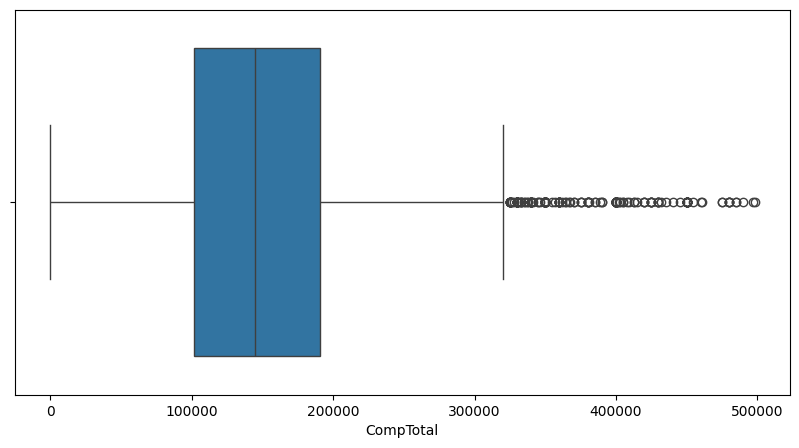

In [15]:
plt.figure(figsize = [10,5])
sns.boxplot(data=df_cleaned, x='CompTotal')

> **This chart looks a lot better with less outliers. Let's take a look at the distribution via histogram**

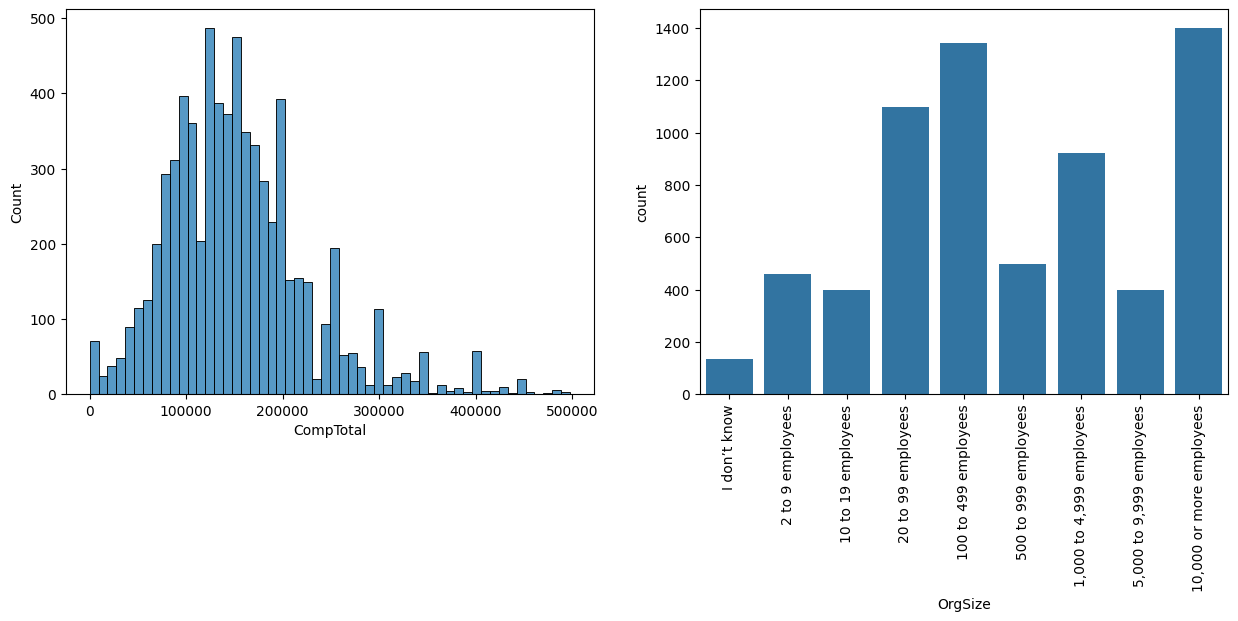

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(data=df_cleaned, x='CompTotal')

# Let's sort the plot by the size of the company
order = ['I don’t know', '2 to 9 employees', '10 to 19 employees', '20 to 99 employees', '100 to 499 employees', 
         '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees', '10,000 or more employees']

plt.subplot(1, 2, 2)
sns.countplot(data=df_cleaned, x='OrgSize', order=order)
plt.xticks(rotation=90);

> **The Annual Salary Histogram is skewed right, a majority of developers get paid 100k to 200k**

> **It also looks like most developers work in a large organization with 10k or more employees**

In [45]:
# Let's see if the size of the company affects annual compensation.
# Let's group our data by orgsize and calculate the mean of compensation for each group.
org_salary = df_cleaned.groupby('OrgSize')['CompTotal'].mean()
org_salary

OrgSize
1,000 to 4,999 employees                              164574.938111
10 to 19 employees                                    139200.399497
10,000 or more employees                              181337.473947
100 to 499 employees                                  148086.669151
2 to 9 employees                                      125549.644880
20 to 99 employees                                    144680.140383
5,000 to 9,999 employees                              156111.412500
500 to 999 employees                                  153006.196393
I don’t know                                          116438.768657
Just me - I am a freelancer, sole proprietor, etc.    133175.163347
Name: CompTotal, dtype: float64

In [46]:
# Let's now convert our groupby series into a pandas function.
org_salary = org_salary.reset_index(drop=False)
org_salary

,OrgSize,CompTotal
0,"1,000 to 4,999 employees",164574.938111
1,10 to 19 employees,139200.399497
2,"10,000 or more employees",181337.473947
3,100 to 499 employees,148086.669151
4,2 to 9 employees,125549.644880
5,20 to 99 employees,144680.140383
6,"5,000 to 9,999 employees",156111.412500
7,500 to 999 employees,153006.196393
8,I don’t know,116438.768657
9,"Just me - I am a freelancer, sole proprietor, ...",133175.163347


In [49]:
# Let rename our CompTotal column to better represent its values and let's sort the renamed column in descending order
org_salary.rename(columns={'CompTotal':'MeanCompTotal'},inplace=True)
org_salary.sort_values(by='MeanCompTotal', ascending=False, inplace=True)

# Let's also reset the index (just good practice)
org_salary.reset_index(inplace=True, drop=True)

# Let's also rename 'Just me- I am a freelancer, sole proprestor, etc' to something shorter like 'Self-Employed'
org_salary.loc[org_salary['OrgSize'] == 'Just me - I am a freelancer, sole proprietor, etc.', 'OrgSize'] = 'Self-Employed'

org_salary

,OrgSize,MeanCompTotal
0,"10,000 or more employees",181337.473947
1,"1,000 to 4,999 employees",164574.938111
2,"5,000 to 9,999 employees",156111.412500
3,500 to 999 employees,153006.196393
4,100 to 499 employees,148086.669151
5,20 to 99 employees,144680.140383
6,10 to 19 employees,139200.399497
7,Self-Employed,133175.163347
8,2 to 9 employees,125549.644880
9,I don’t know,116438.768657


> **Let's visualize this on a barplot, so the information is easier to digest.**

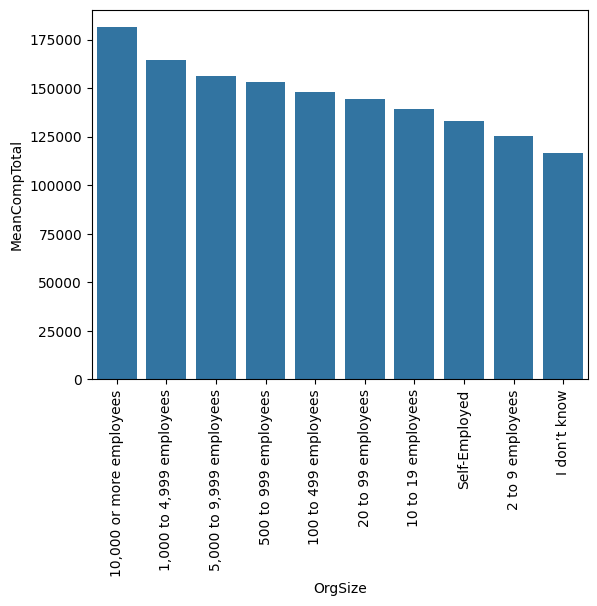

In [21]:
sns.barplot(data=org_salary, x='OrgSize', y='MeanCompTotal')
plt.xticks(rotation=90);

### Modeling

> Select algorithms based on data characteristics

> Train models and adjust hyperparameters to improve performance

In [46]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6902 entries, 389 to 65270
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        6902 non-null   object 
 1   EdLevel    6902 non-null   object 
 2   OrgSize    6902 non-null   object 
 3   Country    6902 non-null   object 
 4   CompTotal  6902 non-null   float64
dtypes: float64(1), object(4)
memory usage: 323.5+ KB


In [47]:
# We can  get rid of Country b/c we are only working with the United States of America
df_cleaned.drop('Country',axis=1, inplace=True)

/tmp/ipykernel_13/1718299088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('Country',axis=1, inplace=True)


In [48]:
# Let's prep our data for our model
# We need to convert our categorical variables into a suitable format for our models

df_dummies = pd.get_dummies(df_cleaned, columns=['Age', 'EdLevel', 'OrgSize'])
df_dummies.head()

,CompTotal,Age_18-24 years old,Age_25-34 years old,Age_35-44 years old,Age_45-54 years old,Age_55-64 years old,Age_65 years or older,Age_Prefer not to say,Age_Under 18 years old,"EdLevel_Associate degree (A.A., A.S., etc.)","EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)","EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",EdLevel_Some college/university study without earning a degree,EdLevel_Something else,"OrgSize_1,000 to 4,999 employees",OrgSize_10 to 19 employees,"OrgSize_10,000 or more employees",OrgSize_100 to 499 employees,OrgSize_2 to 9 employees,OrgSize_20 to 99 employees,"OrgSize_5,000 to 9,999 employees",OrgSize_500 to 999 employees,OrgSize_I don’t know,"OrgSize_Just me - I am a freelancer, sole proprietor, etc."
389,110000.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
398,195000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
428,230000.0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
431,85000.0,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
432,160000.0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False


In [54]:
y = df_dummies['CompTotal']
X = df_dummies.drop('CompTotal', axis=1)

In [86]:
# Creating a train_test_split on our X and y to evaluate our model later on
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=7)

In [56]:
# Importing model, I will be using scikit learn's Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [84]:
# Instantiating Model & Training
model = RandomForestRegressor()
model.fit(train_X, train_y)

RandomForestRegressor()

### Evaluating

> Evaluating model accuracy using regression metrics such as r2 and RMSE

> Validate model with unseen data to ensure generalization

In [103]:
# Grabing predictions for evaluations
y_test_pred = model.predict(X_test)  # Unseen Data
y_train_pred = model.predict(X_train) # Seen Data

In [107]:
# r2 evaluation
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

# root mean squared error evaluation
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print(f'The R2 scores are train: {train_r2}, test: {test_r2}')
print(f'The RMSE values are train: {train_rmse}, test: {test_rmse}')

The R2 scores are train: 0.22098498794242294, test: 0.06479189986673284
The RMSE values are train: 66110.12744979387, test: 74562.75218979537


### Reflections: 
Both of our model's R2 score and RMSE value is not great. On top of that our r2 train score is way higher than our test score indicating that there is overfitting. I would love to learn how to make my predictive model more accurate, but as of this moment, that is beyond the scope of my knowledge.